In [107]:
%load_ext autoreload
%autoreload 2
import neptune as n
import copy
import numpy as np
from matplotlib import pyplot as plt
import lmfit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# first, average the flats
rerun_flats = False
if rerun_flats:
    medflats = n.process_flats()
else:
    medflats = n.retrieve_flats()

In [3]:
# first, average the sciences
sciences = n.get_sciences()
uncorr_sciences = copy.deepcopy(sciences)
# viewing the images and looking for Neptune shows us we should use
# 0 1 2 4 for H
# 0 1 2 4 for J (no 3 exists so you'll index into this as 0 1 2 3)
# 1 2 3 4 for Ks

with np.errstate(divide='ignore', invalid='ignore'):
    for k in sciences:
        for i in range(len(sciences[k])):
            sciences[k][i] /= medflats[k]
            sciences[k][i][n.wherenan(sciences[k][i])] = 0

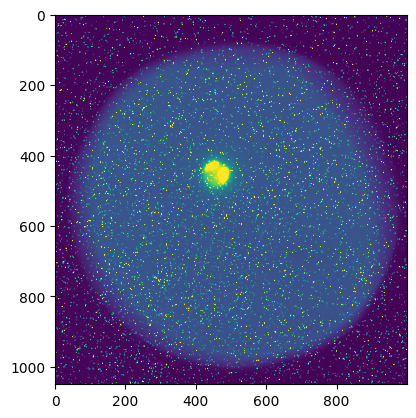

In [5]:
n.view_as_ds9(n.crop_to_ao(uncorr_sciences["H"][1]))

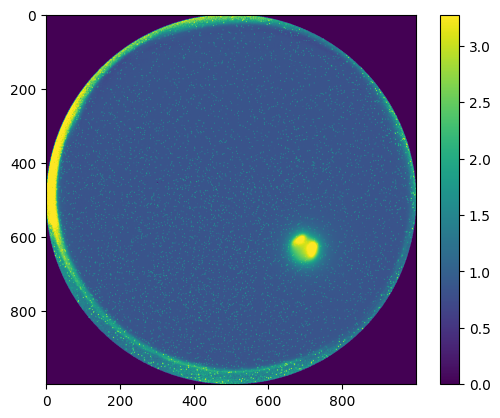

In [109]:
plt.imshow(renorm_to_find_neptune(sciences["H"][0]))
plt.colorbar()

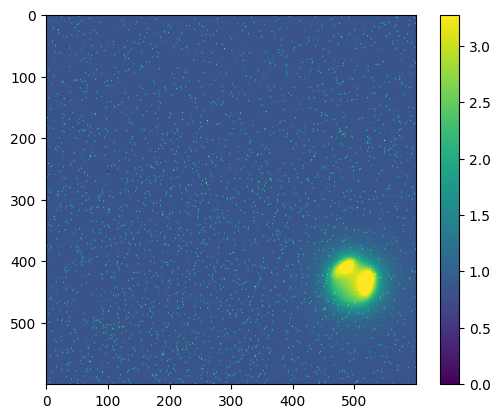

In [108]:
plt.imshow(renorm_to_find_neptune(sciences["H"][0])[200:-200, 200:-200])
plt.colorbar()

100%|██████████| 4/4 [00:08<00:00,  2.19s/it]


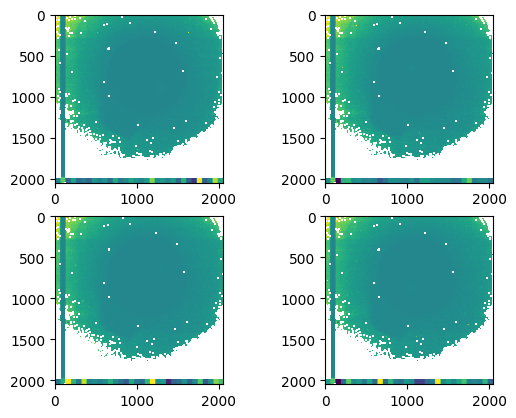

In [43]:
fh, axsh = plt.subplot_mosaic("01;24")
for i in tqdm([0,1,2,4]):
    img = sciences["H"][i]
    ax = axsh[str(i)]
    view_as_ds9(img, ax)
    binned = submatsum(img, 512, 512)
    ym, xm = argmax(binned)
    # ax.scatter(xm * 4, ym * 4, color='k', s=3)

100%|██████████| 4/4 [00:10<00:00,  2.67s/it]


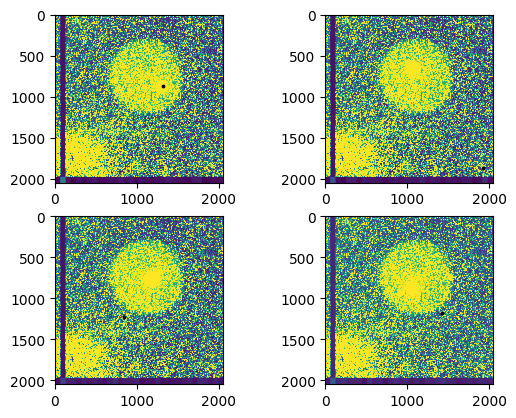

In [34]:
fj, axsj = plt.subplot_mosaic("01;23")
for i in trange(4):
    img = sciences["J"][i]
    ax = axsj[str(i)]
    view_as_ds9(img, ax)
    binned = submatsum(img, 512, 512)
    ym, xm = argmax(binned)
    ax.scatter(xm * 4, ym * 4, color='k', s=3)